# UMAP Analysis

Based on the following [UMAP library](https://umap-learn.readthedocs.io).

In [36]:
# Preambe
%matplotlib inline
import sys
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot
import warnings
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from mpl_toolkits.mplot3d import Axes3D
py.offline.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

In [2]:
import umap

Bring in all the data and the vectors.

In [3]:
%store -r model_words # List of negative model words

no stored variable # List of negative model words


In [20]:
def words_to_vectors(model, words):
    "Create the word to vector mapping"
    safe_words = []
    not_safe_words = []
    vectors = []
    
    # Figure out which words are in the vocab:
    all_words = sorted(words)
    for word in all_words:
        try:
            vectors.append(model[word])
            safe_words.append(word)
        except:
            not_safe_words.append(word)
    
    return safe_words, vectors

Load in the Stanford model:

In [5]:
def load_stanford_model(filename, binary=False):
    "Load the vectors from the given filename"
    return KeyedVectors.load_word2vec_format(filename, binary=binary)

In [7]:
stanford_model = load_stanford_model(filename = 'data/glove.6B.50d.w2v')

In [8]:
stanford_model

In [21]:
words, vectors = words_to_vectors(stanford_model, model_words)

In [22]:
len(words)

517

In [23]:
df = pd.DataFrame({'words':words, 'vectors':vectors})

In [24]:
df.head()

,words,vectors
0,abdominal,"[1.1632, 0.029568, -0.7263, -0.3936, -0.52519,..."
1,acetaminophen,"[1.0553, -0.1131, -0.0013923, -1.1401, 0.13013..."
2,activated,"[0.217, -0.86111, 0.92143, 0.23773, 0.26972, -..."
3,actively,"[0.18831, -1.0536, -0.019578, -0.43794, 0.4318..."
4,acute,"[1.409, 0.51897, -0.34342, -0.57212, -0.76818,..."


### UMAP

In [25]:
fit = umap.UMAP()

In [35]:
f1 = fit.fit_transform(vectors)
f1

array([[ 1.5804788 , -0.5299022 ],
       [ 2.2253656 ,  3.288356  ],
       [ 6.731294  ,  0.31058446],
       ...,
       [ 8.087165  , -0.72990376],
       [ 3.3356414 ,  4.0628786 ],
       [ 3.5758715 ,  3.8689349 ]], dtype=float32)

## Hyperparameters

UMAP has several hyper parameters we can configure:

   - n_neighbors
   - min_dist
   - n_components
   - metric

We'll write a sccript to loop through various parameters and produce multiple graphs.

In [43]:
def draw_umap(data, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)

In [44]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

#### n_neighbors

Read about this hyperparameter [here](https://umap-learn.readthedocs.io/en/latest/parameters.html#n-neighbors)

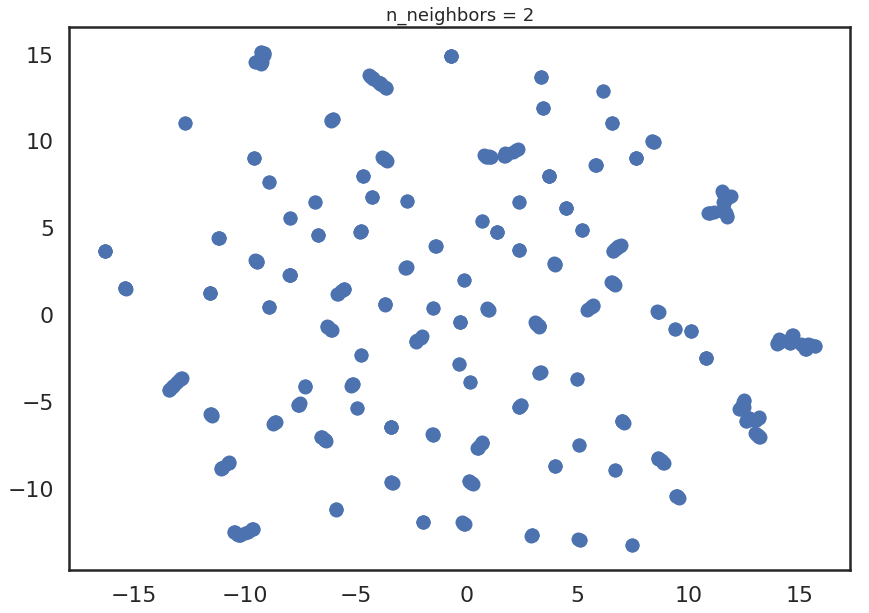

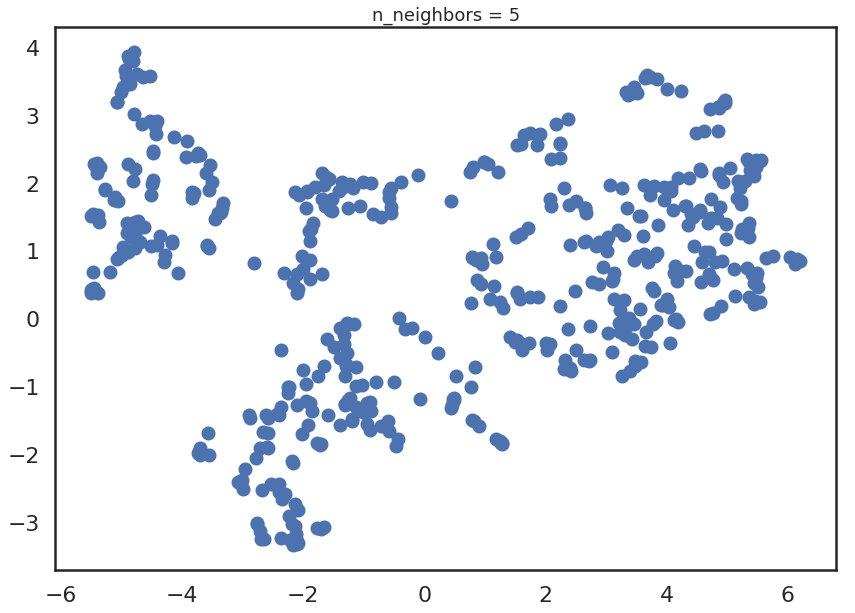

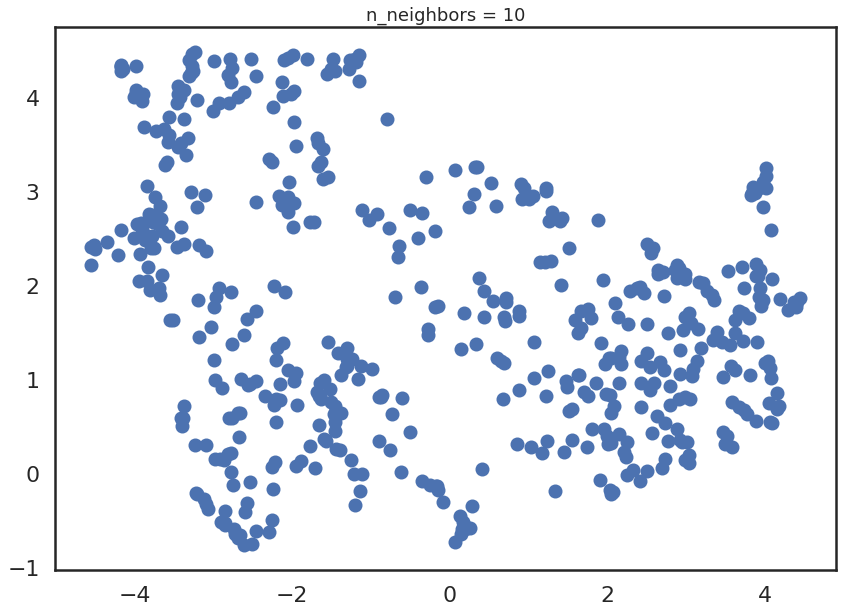

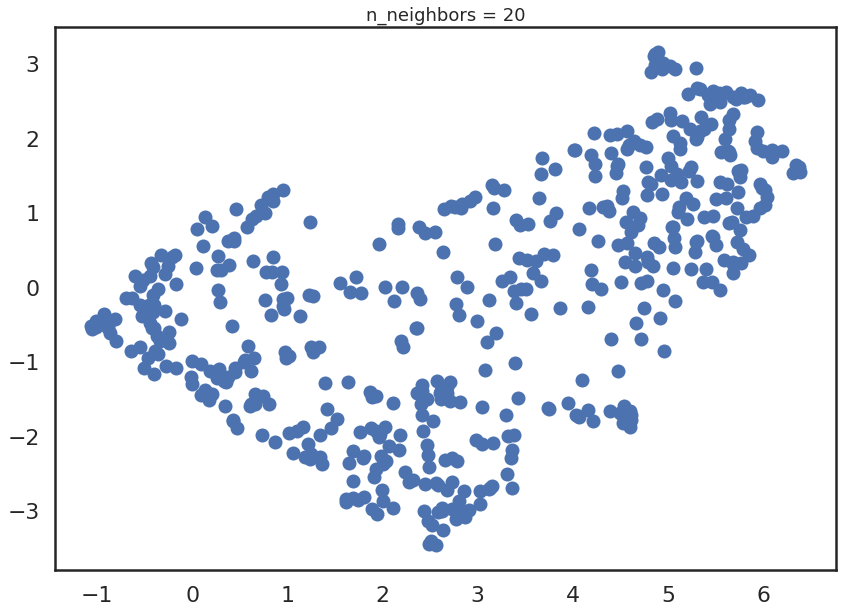

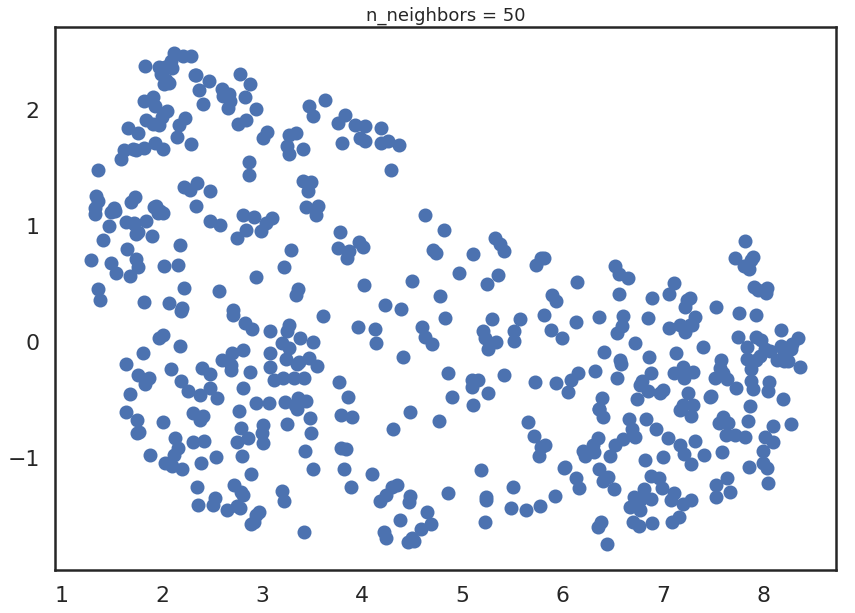

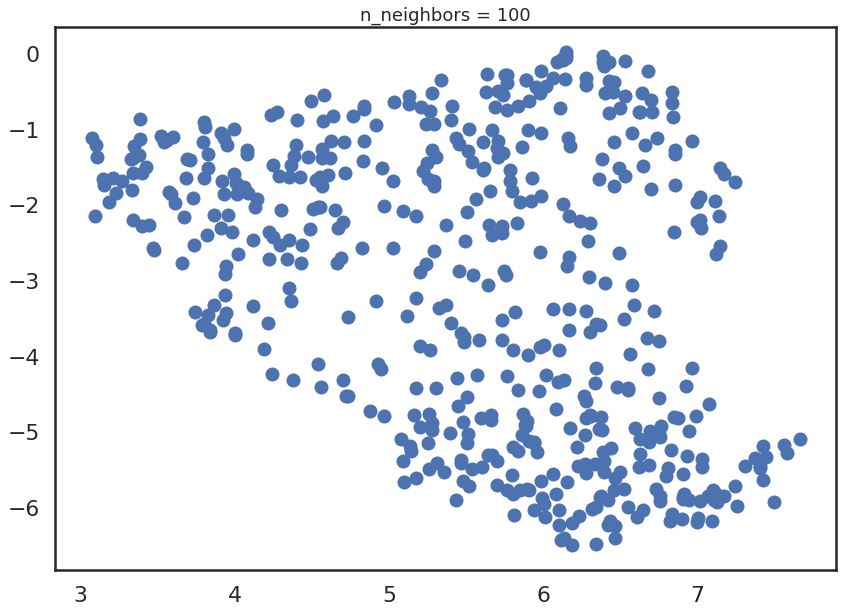

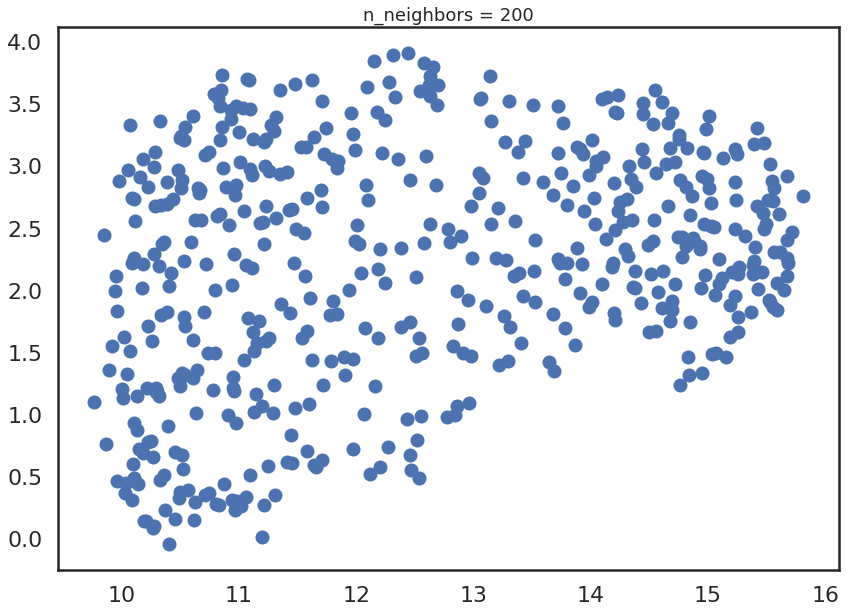

In [45]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(data=vectors, n_neighbors=n, title='n_neighbors = {}'.format(n))

#### min_dist

Read about this hyper parameter [here](https://umap-learn.readthedocs.io/en/latest/parameters.html#n-neighbors)

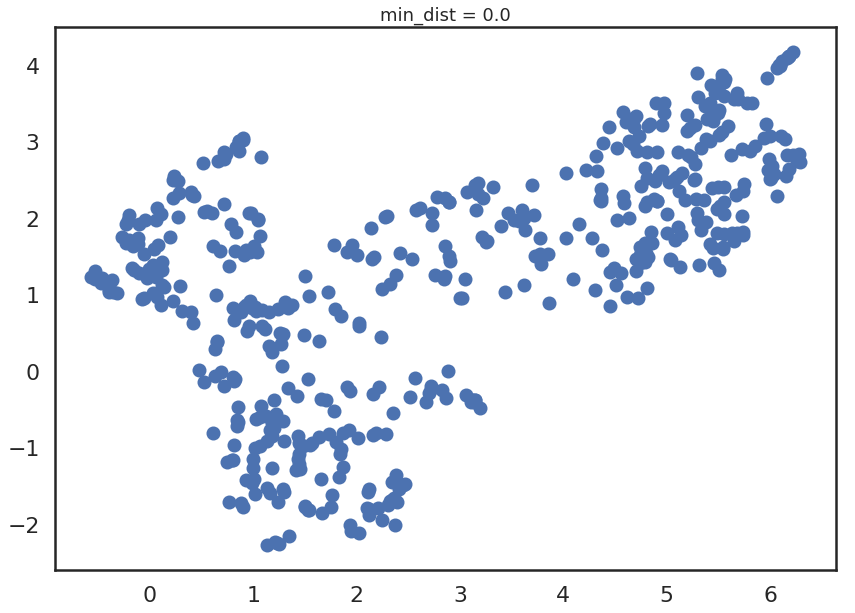

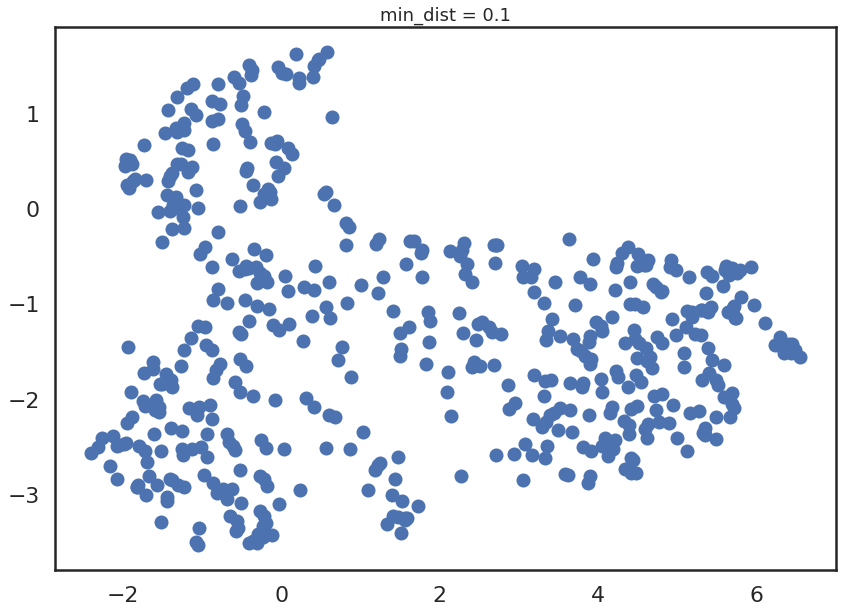

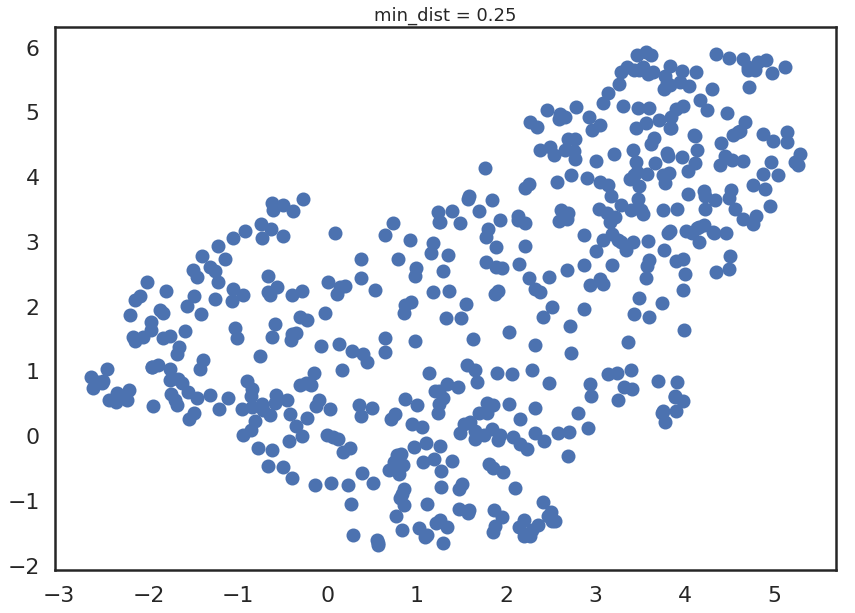

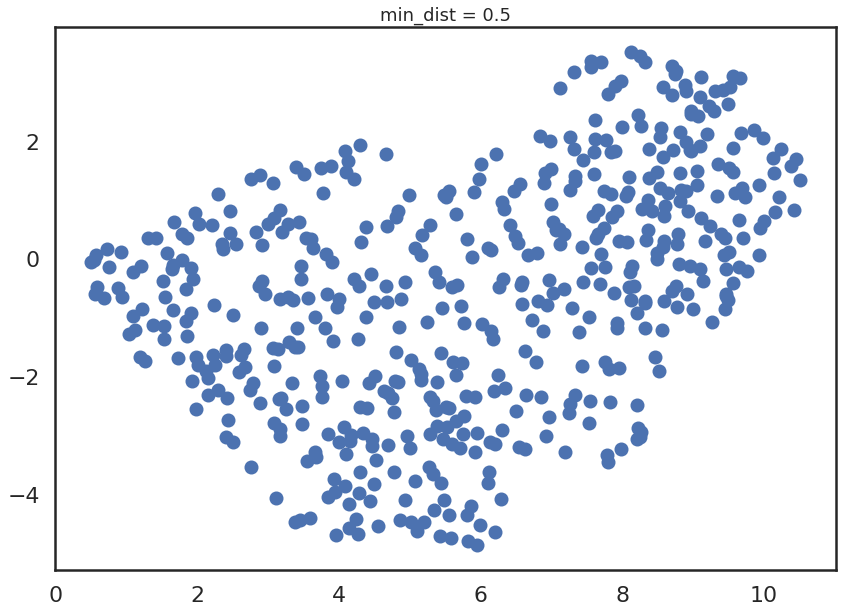

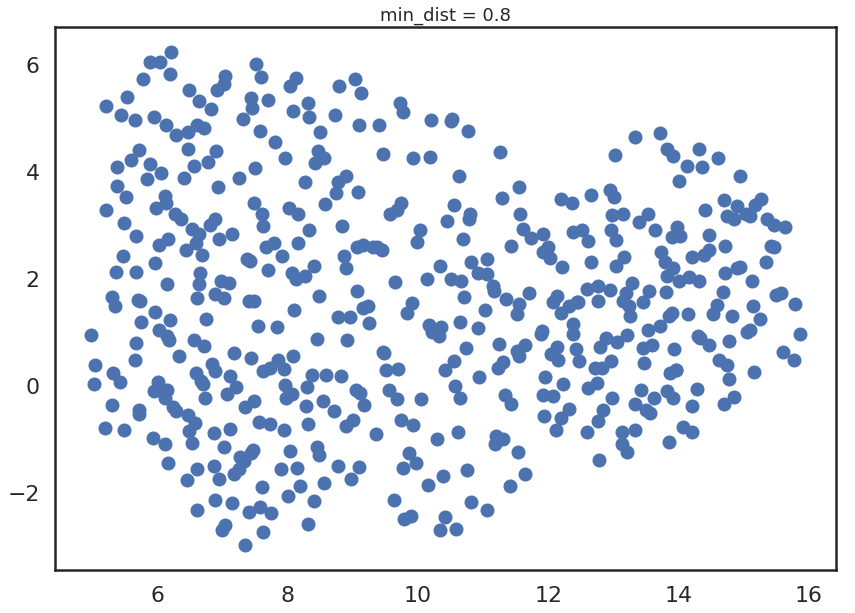

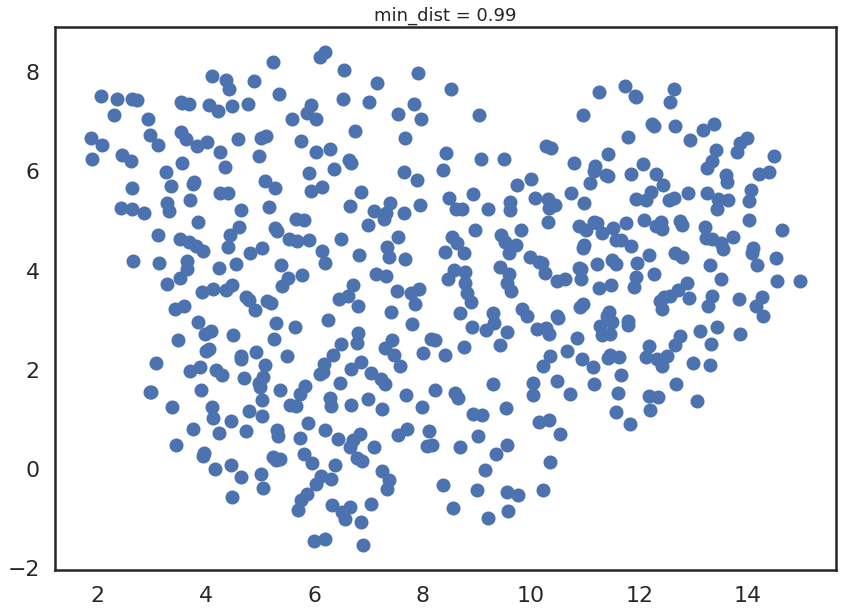

In [46]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(data=vectors, min_dist=d, title='min_dist = {}'.format(d))

#### n_components

Read about the hyper-parameter [here](https://umap-learn.readthedocs.io/en/latest/parameters.html#n-components). It basically controls the dimension to which UMAP does a reduction.

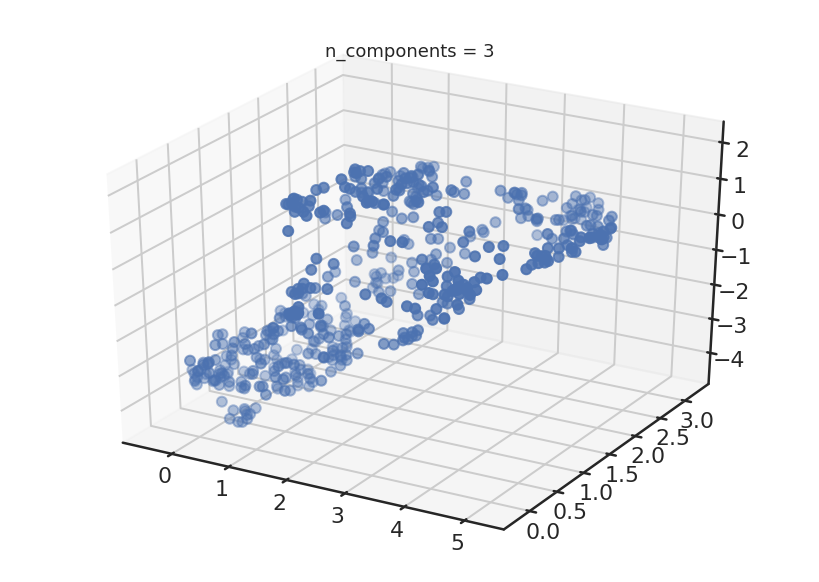

In [47]:
draw_umap(data=vectors, n_components=3, title='n_components = 3')

#### "The best one"

Out of the above one, I have chosen one that looks like a good combination of the hyper parameters.

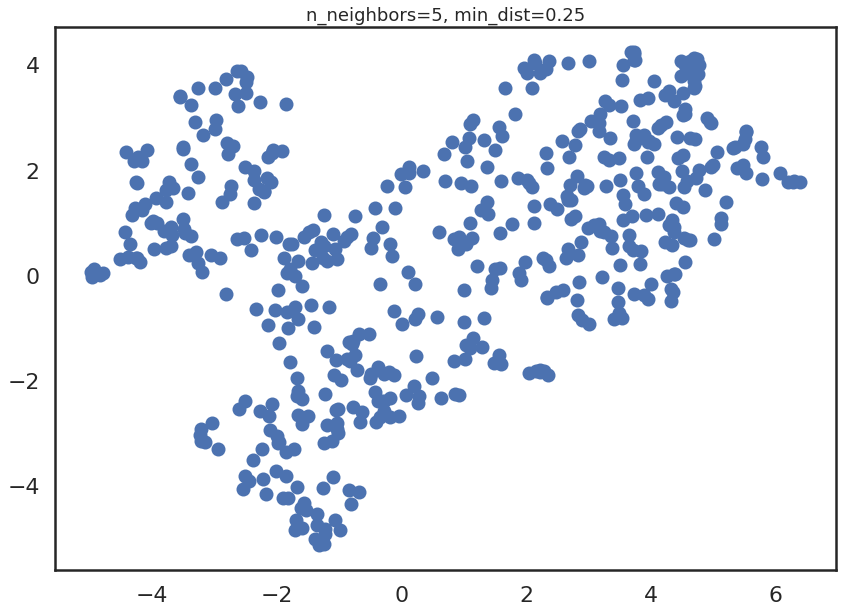

In [62]:
draw_umap(data=vectors, n_neighbors=5, min_dist=0.25, title='n_neighbors=5, min_dist=0.25')

##### Interactive plot

In [101]:
def interactive_plot(data, save=False, show_labels=False):
    "Creates the t-SNE interactive plot"
    items = []
    
    # Should we show markers / markers & text
    if show_labels:
        mode = "markers+text"
    else:
        mode = "markers"

    # Create a trace for the data
    trace0= go.Scatter(
        x= data[:,0],
        y= data[:,1],
        mode= mode,
        text= words,
        textposition='top center')
    items.append(trace0);
        
    title = "UMAP for Embedded Vectors for {} words"
    
    # Save the html file 
    if save:
        py.offline.plot({
            "data": items, 
            "layout": go.Layout(title=title.format(len(words)), 
                            showlegend=False)
        }, auto_open=False, filename="output/umap-interactive-plot.html")
    
    
    py.offline.iplot({
        "data": items, 
        "layout": go.Layout(title=title.format(len(model_words)), 
                            showlegend=False)
    })

In [102]:
fit = umap.UMAP(
        n_neighbors=5,
        min_dist=0.25,
        n_components=2,
    )
v = fit.fit_transform(vectors);

In [103]:
interactive_plot(data=v, show_labels=True)